<center><h1>HosseinzadehKaligh_Ehsan_HW5</h1></center>
<br>
<br>

Name: Ehsan Hosseinzadeh Khaligh
<br>
Github Username: ehsankhaligh
<br>
USC ID: 1112811250

## 1. Decision Trees as Interpretable Models

Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.datasets as datasets
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

!pip install xgboost
import xgboost as xgb

In [2]:
import warnings
warnings.filterwarnings('ignore')

### (a) Obtain Data

Get the Accute Inamations Data Set

In [3]:
df_list=[]

with open('../data/diagnosis.data') as f:
    for val in f.readlines():
        val = val.replace("\n","")
        val = val.replace("\t",":")
        val = val.replace("\x00","")
        val = val.split(':')
        if '' not in val:
            df_list.append(val)


df = pd.DataFrame(df_list)
df = df.replace(',', '.', regex=True)
df.columns = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'd1', 'd2']
df['a1'] = df['a1'].astype(float)
df.iloc[:, 1:] = df.iloc[:, 1:].replace({'yes': 1, 'no': 0})

display(df.shape)
display(df.head())

(120, 8)

,a1,a2,a3,a4,a5,a6,d1,d2
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


### (b) Build a decision tree

In [4]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['a1', 'a2', 'a3', 'a4', 'a5', 'a6']], df[['d1', 'd2']], test_size=0.2, random_state=100)

# Build decision tree
clf = DecisionTreeClassifier(criterion="gini", max_depth=4)
clf.fit(X_train, y_train)

# Predict on testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 100.00%


|--- a1 <= 37.95
|   |--- a3 <= 0.50
|   |   |--- class: 1
|   |--- a3 >  0.50
|   |   |--- class: 0
|--- a1 >  37.95
|   |--- a3 <= 0.50
|   |   |--- class: 0
|   |--- a3 >  0.50
|   |   |--- a5 <= 0.50
|   |   |   |--- class: 0
|   |   |--- a5 >  0.50
|   |   |   |--- a4 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- a4 >  0.50
|   |   |   |   |--- class: 0



[Text(0.4, 0.9, 'a1 <= 37.95\ngini = 0.497\nsamples = 96\nvalue = [[49, 47]\n[53, 43]]'),
 Text(0.2, 0.7, 'a3 <= 0.5\ngini = 0.22\nsamples = 46\nvalue = [[15, 31]\n[46, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [[0, 31]\n[31, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [[15, 0]\n[15, 0]]'),
 Text(0.6, 0.7, 'a3 <= 0.5\ngini = 0.338\nsamples = 50\nvalue = [[34, 16]\n[7, 43]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [[7, 0]\n[7, 0]]'),
 Text(0.7, 0.5, 'a5 <= 0.5\ngini = 0.234\nsamples = 43\nvalue = [[27, 16]\n[0, 43]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [[18, 0]\n[0, 18]]'),
 Text(0.8, 0.3, 'a4 <= 0.5\ngini = 0.23\nsamples = 25\nvalue = [[9, 16]\n[0, 25]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [[9, 0]\n[0, 9]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [[0, 16]\n[0, 16]]')]

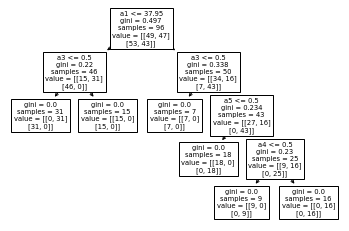

In [5]:
text_representation = tree.export_text(clf, feature_names=['a1', 'a2', 'a3', 'a4', 'a5', 'a6'])
print(text_representation)

plot_tree = tree.plot_tree(clf,feature_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6'], class_names = ['d1', 'd2'])
display(plot_tree)

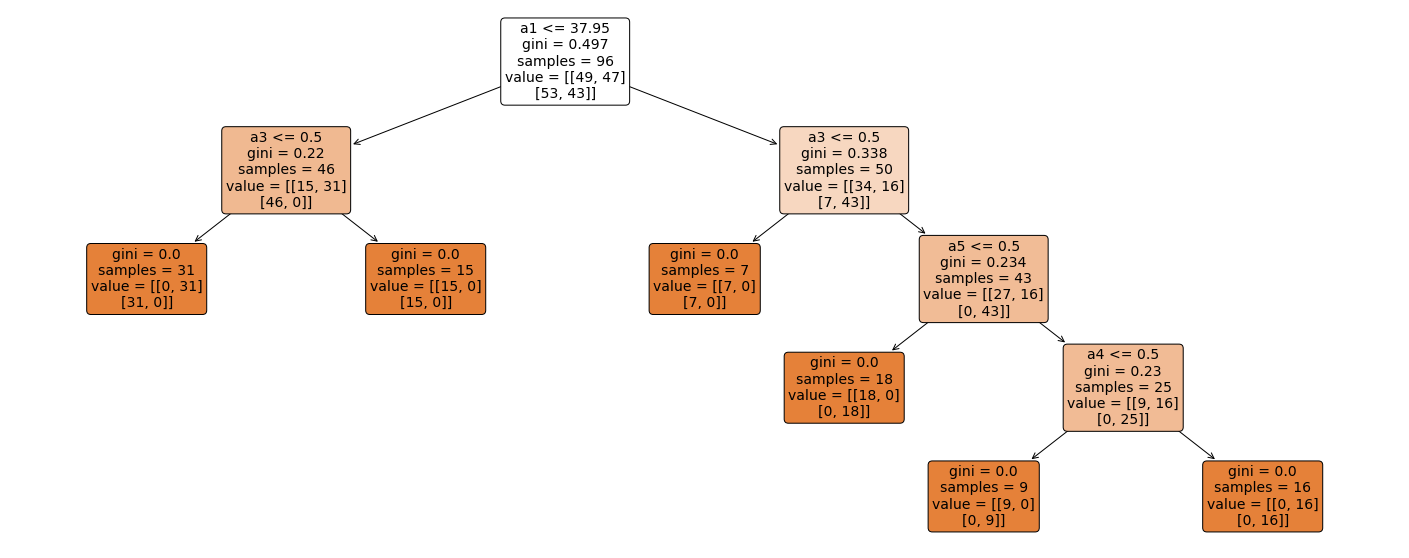

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=['a1', 'a2', 'a3', 'a4', 'a5', 'a6'], 
              class_names=['0', '1'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

### (c) Convert the decision rules

In [7]:
#Source: https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html
def tree_to_pseudo(tree, feature_names):
    """
    Outputs a decision tree model as if/then pseudocode

    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as pseudocode
    feature_names: list
        The feature names of the dataset used for building the decision tree
    """

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent,"}")
        else:
            print(indent,"return " + str(value[node]))

    recurse(left, right, threshold, features, 0)

In [8]:
tree_to_pseudo(clf, ['a1', 'a2', 'a3', 'a4', 'a5', 'a6'])

 if ( a1 <= 37.95000076293945 ) {
   if ( a3 <= 0.5 ) {
     return [[ 0. 31.]
 [31.  0.]]
   } else {
     return [[15.  0.]
 [15.  0.]]
   }
 } else {
   if ( a3 <= 0.5 ) {
     return [[7. 0.]
 [7. 0.]]
   } else {
     if ( a5 <= 0.5 ) {
       return [[18.  0.]
 [ 0. 18.]]
     } else {
       if ( a4 <= 0.5 ) {
         return [[9. 0.]
 [0. 9.]]
       } else {
         return [[ 0. 16.]
 [ 0. 16.]]
       }
     }
   }
 }


### (d) cost-complexity pruning

In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha

###### Greater values of ccp_alpha increase the number of nodes pruned.

Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

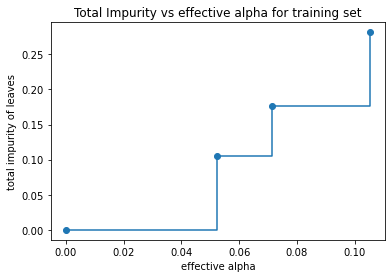

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[['a1', 'a2', 'a3', 'a4', 'a5', 'a6']], df[['d1', 'd2']], test_size=0.2, random_state=100)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")




ccp_alpha: 0.0
|--- a1 <= 37.95
|   |--- a4 <= 0.50
|   |   |--- class: 0
|   |--- a4 >  0.50
|   |   |--- class: 1
|--- a1 >  37.95
|   |--- a3 <= 0.50
|   |   |--- class: 0
|   |--- a3 >  0.50
|   |   |--- a5 <= 0.50
|   |   |   |--- class: 0
|   |   |--- a5 >  0.50
|   |   |   |--- a4 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- a4 >  0.50
|   |   |   |   |--- class: 0



[Text(0.4, 0.9, 'a1 <= 37.95\ngini = 0.497\nsamples = 96\nvalue = [[49, 47]\n[53, 43]]'),
 Text(0.2, 0.7, 'a4 <= 0.5\ngini = 0.22\nsamples = 46\nvalue = [[15, 31]\n[46, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [[15, 0]\n[15, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [[0, 31]\n[31, 0]]'),
 Text(0.6, 0.7, 'a3 <= 0.5\ngini = 0.338\nsamples = 50\nvalue = [[34, 16]\n[7, 43]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [[7, 0]\n[7, 0]]'),
 Text(0.7, 0.5, 'a5 <= 0.5\ngini = 0.234\nsamples = 43\nvalue = [[27, 16]\n[0, 43]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [[18, 0]\n[0, 18]]'),
 Text(0.8, 0.3, 'a4 <= 0.5\ngini = 0.23\nsamples = 25\nvalue = [[9, 16]\n[0, 25]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [[9, 0]\n[0, 9]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [[0, 16]\n[0, 16]]')]

ccp_alpha: 0.05232558139534884
|--- a1 <= 37.95
|   |--- a4 <= 0.50
|   |   |--- class: 0
|   |--- a4 >  0.50
|   |   |--- class: 1
|--- a1 >  37.95
|   |--- a3 <= 0.50
|   |   |--- class: 0
|   |--- a3 >  0.50
|   |   |--- class: 0



[Text(0.5, 0.8333333333333334, 'a1 <= 37.95\ngini = 0.497\nsamples = 96\nvalue = [[49, 47]\n[53, 43]]'),
 Text(0.25, 0.5, 'a4 <= 0.5\ngini = 0.22\nsamples = 46\nvalue = [[15, 31]\n[46, 0]]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 15\nvalue = [[15, 0]\n[15, 0]]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 31\nvalue = [[0, 31]\n[31, 0]]'),
 Text(0.75, 0.5, 'a3 <= 0.5\ngini = 0.338\nsamples = 50\nvalue = [[34, 16]\n[7, 43]]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [[7, 0]\n[7, 0]]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.234\nsamples = 43\nvalue = [[27, 16]\n[0, 43]]')]

ccp_alpha: 0.071390503875969
|--- a1 <= 37.95
|   |--- a4 <= 0.50
|   |   |--- class: 0
|   |--- a4 >  0.50
|   |   |--- class: 1
|--- a1 >  37.95
|   |--- class: 0



[Text(0.6, 0.8333333333333334, 'a1 <= 37.95\ngini = 0.497\nsamples = 96\nvalue = [[49, 47]\n[53, 43]]'),
 Text(0.4, 0.5, 'a4 <= 0.5\ngini = 0.22\nsamples = 46\nvalue = [[15, 31]\n[46, 0]]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 15\nvalue = [[15, 0]\n[15, 0]]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 31\nvalue = [[0, 31]\n[31, 0]]'),
 Text(0.8, 0.5, 'gini = 0.338\nsamples = 50\nvalue = [[34, 16]\n[7, 43]]')]

ccp_alpha: 0.10529891304347826
|--- a1 <= 37.95
|   |--- class: 1
|--- a1 >  37.95
|   |--- class: 0



[Text(0.5, 0.75, 'a1 <= 37.95\ngini = 0.497\nsamples = 96\nvalue = [[49, 47]\n[53, 43]]'),
 Text(0.25, 0.25, 'gini = 0.22\nsamples = 46\nvalue = [[15, 31]\n[46, 0]]'),
 Text(0.75, 0.25, 'gini = 0.338\nsamples = 50\nvalue = [[34, 16]\n[7, 43]]')]

ccp_alpha: 0.21583823973429955
|--- class: 1



[Text(0.5, 0.5, 'gini = 0.497\nsamples = 96\nvalue = [[49, 47]\n[53, 43]]')]

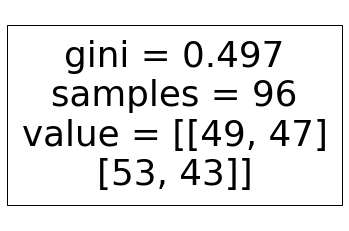

In [10]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
    text_representation = tree.export_text(clf, feature_names=['a1', 'a2', 'a3', 'a4', 'a5', 'a6'])
    print("ccp_alpha:", ccp_alpha)
    print(text_representation)
    plot_tree = tree.plot_tree(clf,feature_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6'], class_names = ['d1', 'd2'])
    display(plot_tree)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.21583823973429955


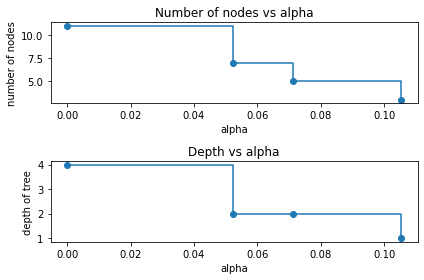

In [11]:
# The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

#we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

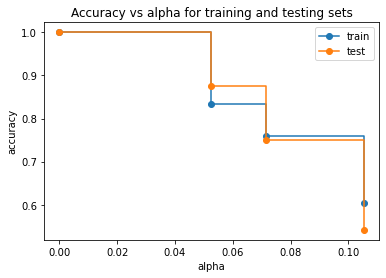

In [12]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

For alpha around 0.05 I think it is a good value to select to have reasnable accuacy & Depth

## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [13]:
attrbutes = []
with open('../data/communities.names', 'r') as file:
    lines = file.readlines()
    for line in lines:
        if (line.startswith('@attribute')):
            attrbutes.append(line.split(" ")[1])

            
#Attribute Information: (122 predictive, 5 non-predictive, 1 goal) = 128
print("Total:", len(attrbutes), "attributes.")


#-- state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)
#-- county: numeric code for county - not predictive, and many missing values (numeric)
#-- community: numeric code for community - not predictive and many missing values (numeric)
#-- communityname: community name - not predictive - for information only (string)
#-- fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)
print("Attributes to be ignored:", attrbutes[:5])

#-- ViolentCrimesPerPop: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)
print("attrbutes[-1]:", attrbutes[-1])
    

Total: 128 attributes.
Attributes to be ignored: ['state', 'county', 'community', 'communityname', 'fold']
attrbutes[-1]: ViolentCrimesPerPop


In [14]:
df = pd.read_csv('../data/communities.data', sep=",", header=None, names=attrbutes, na_values='?')
display(df.head())
display(df.shape)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


(1994, 128)

#### select test and train below after cleaning

### (b) Missing values

In [15]:
# replace NaN with column mean
df = df.fillna(df.mean())

#remove non predictive columns 
df = df.drop(columns=['state', 'county', 'community', 'communityname', 'fold'])

df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


In [16]:
train_df = df[:1495]
test_df = df[1495:]

display(train_df.shape)
display(test_df.shape)

(1495, 123)

(499, 123)

### (c) Plot a correlation matrix

A correlation coefficient of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases in a linear fashion.

A correlation coefficient of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases in a linear fashion.

A correlation coefficient of 0 indicates no linear relationship between the two variables. However, it's important to note that there may be other types of relationships between the variables that are not captured by the correlation coefficient.

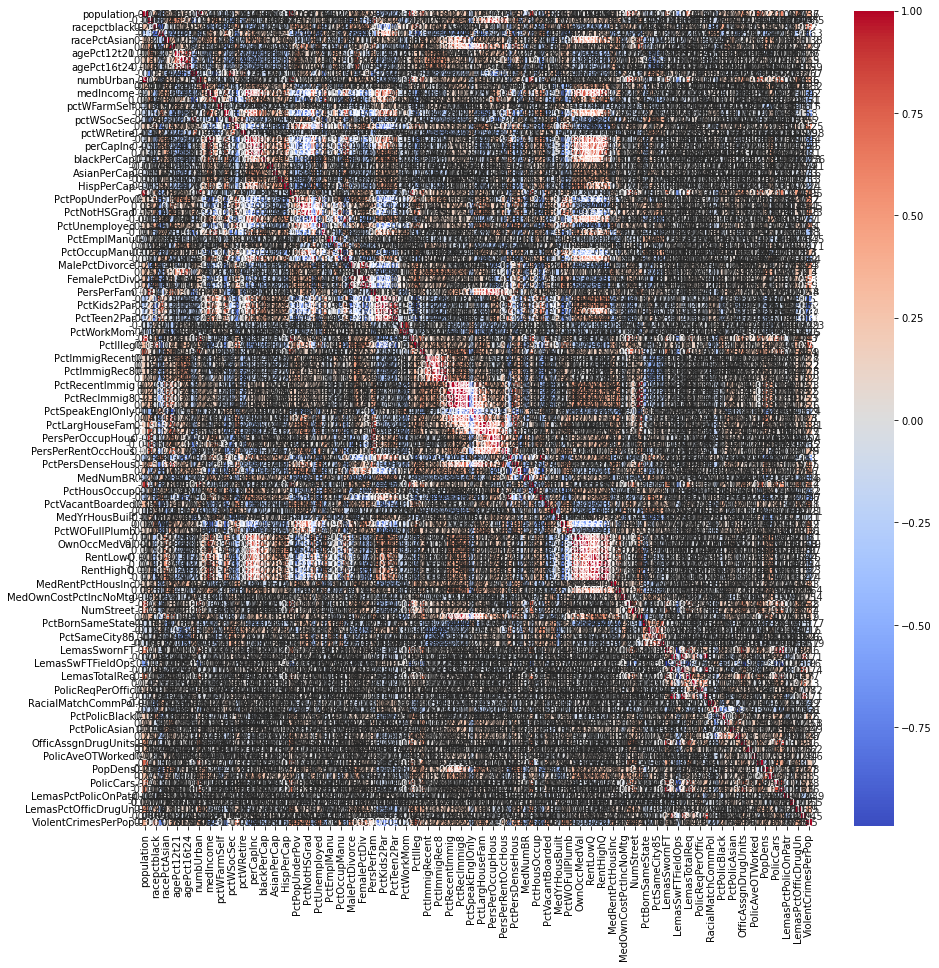

In [17]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 15))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)

# Show the plot
plt.show()

### (d) Calculate the Coefficient of Variation CV

The formula for calculating the CV is:

CV = (s / m) * 100%

A low CV indicates that the data points in the dataset are close to the mean and have low variability, while a high CV indicates that the data points are widely spread out from the mean and have high variability. The CV can be useful in fields such as finance, economics, and biology, where it is often used to evaluate the risk associated with an investment or to compare the variability of different sets of data.

In [18]:
# assume df is the pandas DataFrame with the data
# calculate sample standard deviation and mean for each feature
s = df.std(axis=0, ddof=1)
m = df.mean(axis=0)

# calculate CV for each feature
cv = s / m

# print CV for each feature
print(cv)

population             2.203503
householdsize          0.353298
racepctblack           1.410920
racePctWhite           0.323782
racePctAsian           1.359162
                         ...   
LemasPctPolicOnPatr    0.122331
LemasGangUnitDeploy    0.368040
LemasPctOfficDrugUn    2.555266
PolicBudgPerPop        0.337281
ViolentCrimesPerPop    0.979015
Length: 123, dtype: float64


### (e) Scatter plots and box plots for highest CV features

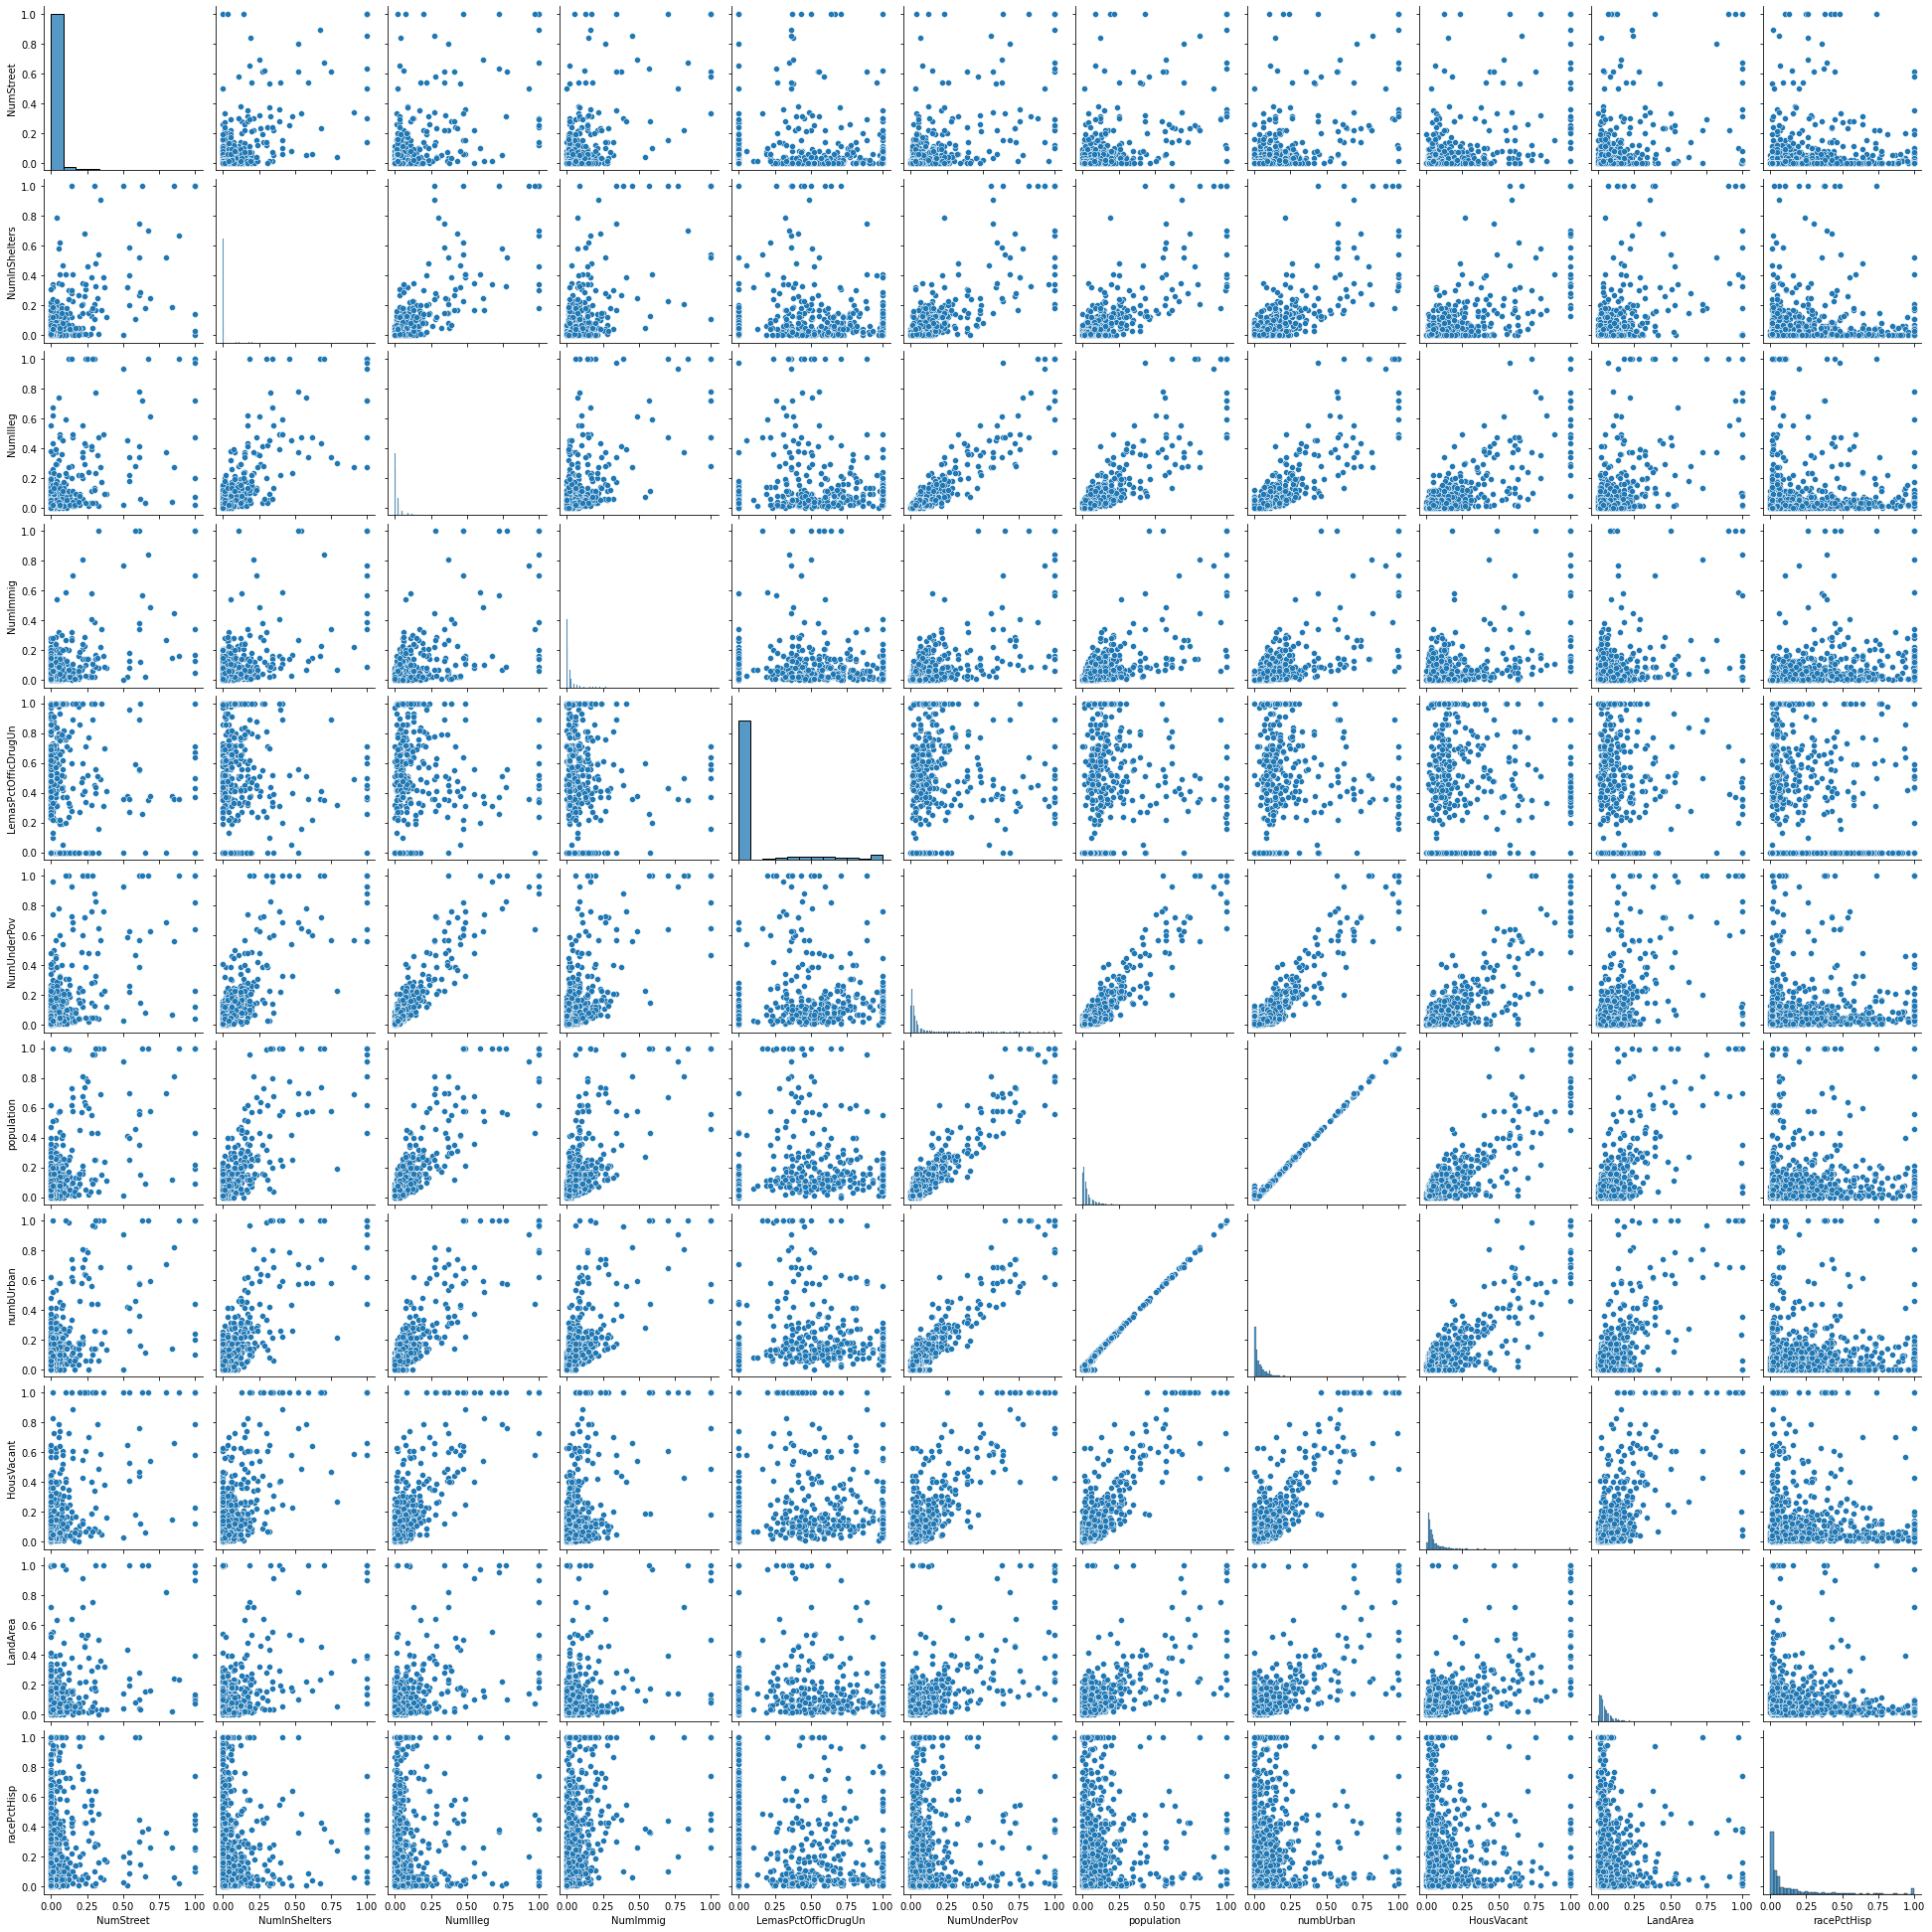

In [19]:
# select top sqrt(128) features with highest CV
top_features = cv.nlargest(int(np.sqrt(128))).index

sns.pairplot(df[top_features])
plt.show()

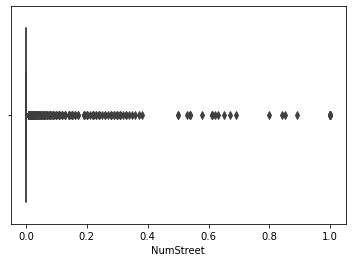

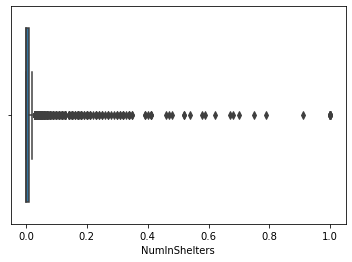

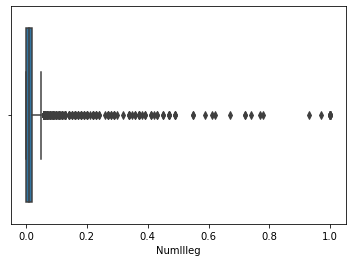

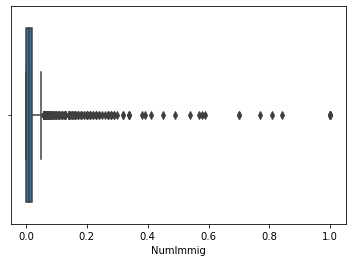

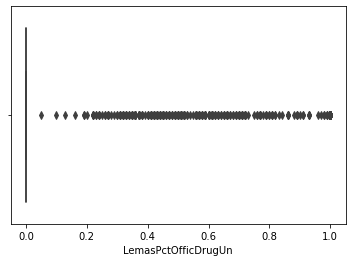

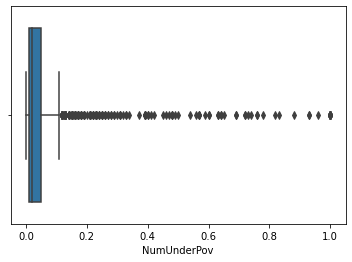

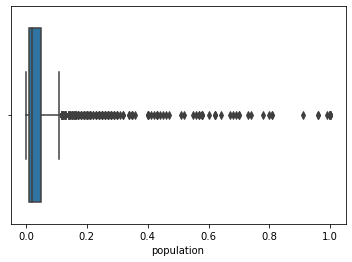

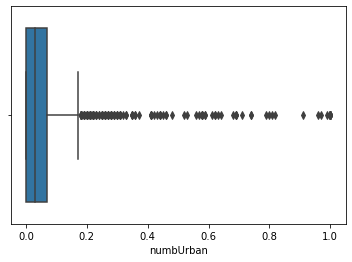

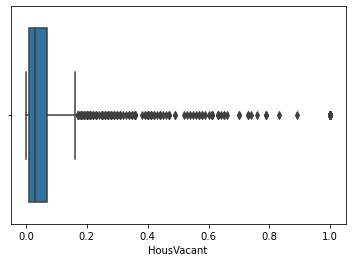

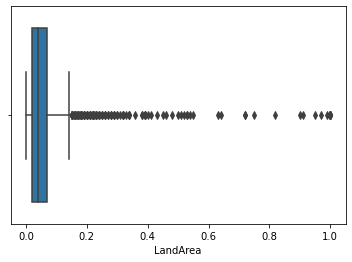

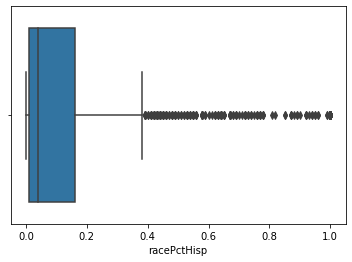

In [20]:
for feature in top_features:
    sns.boxplot(x=df[feature])
    plt.show()

The scatter plots can give us an idea about the relationship between the features and whether there are any outliers or patterns in the data. However, for me it was not obvious to draw a conclusion, I need to build an ML model to have conclusion 

### (f) Fit a linear model

In [21]:
#label to predict: ViolentCrimesPerPop

y_train = train_df['ViolentCrimesPerPop'].values.tolist()
cleaned_train_df = train_df.drop('ViolentCrimesPerPop', axis=1)
X_train = cleaned_train_df.values.tolist()

y_test = test_df['ViolentCrimesPerPop'].values.tolist()
cleaned_test_df = test_df.drop('ViolentCrimesPerPop', axis=1)
X_test = cleaned_test_df.values.tolist()

In [22]:
print("len(y_train):", len(y_train))
print("len(y_train):", len(y_train))

print("len(X_test):", len(X_test))
print("len(y_test):", len(y_test))

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)

print("Test error:", test_error)

len(y_train): 1495
len(y_train): 1495
len(X_test): 499
len(y_test): 499
Test error: 0.7897255274161245


### (g) Fit a ridge regression model

Note:

Regularization is a technique used in machine learning to avoid overfitting of the model to the training data. It involves adding a penalty term to the loss function to encourage the model to have smaller weights or coefficients.

L2-norm penalty, also known as ridge regression, is a type of regularization technique that adds a penalty term to the loss function proportional to the squared value of the model coefficients. The penalty term is controlled by a hyperparameter lambda (λ), which determines the amount of regularization applied to the model. Ridge regression is commonly used to handle multicollinearity (correlation among predictor variables) in regression analysis.

Ridge Regression is a variant of linear regression where the coefficients are regularized with the L2-norm penalty. The L2-norm penalty adds a penalty term to the sum of squared residuals in the linear regression objective function, with a tuning parameter λ controlling the strength of the penalty term. The goal is to find the set of coefficients that minimize the sum of squared residuals plus the penalty term, which helps to prevent overfitting by shrinking the coefficients towards zero.

In [23]:
# Fit ridge regression model with cross-validation to select the best value of alpha
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_cv.fit(X_train, y_train)

# Report the best value of alpha selected by cross-validation
print("Best alpha:", ridge_cv.alpha_)

# Evaluate the model on the test set
X_test = test_df.drop('ViolentCrimesPerPop', axis=1)
y_test = test_df['ViolentCrimesPerPop']
y_pred = ridge_cv.predict(X_test)

# Calculate the mean squared error of the predictions
test_error = mean_squared_error(y_test, y_pred)
print("Test error:", test_error)

Best alpha: 1.0
Test error: 0.01773708110430369


### (h) Fit a LASSO model

Note:

LASSO (Least Absolute Shrinkage and Selection Operator) is a regularization method used to prevent overfitting in a regression model. It works by adding a penalty term to the loss function that the model tries to minimize during training. This penalty term is proportional to the absolute value of the coefficients of the regression model. As a result, the LASSO method can force some coefficients to be exactly zero, which effectively performs feature selection.

λ (lambda) is the regularization parameter that controls the strength of the penalty term in the LASSO method. A larger value of λ will result in more coefficients being forced to zero, which leads to a simpler model with fewer features. The optimal value of λ is usually chosen by cross-validation.


In [24]:
lasso_cv = LassoCV(alphas=[0.001, 0.002, 0.005, 1], cv=5, random_state=0, verbose=False) 

lasso_cv.fit(X_train, y_train)
y_predict =lasso_cv.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

print("Test error:", test_error)
print("Best alpha:", lasso_cv.alpha_)

selected_features = lasso_cv.coef_ != 0

Test error: 0.01773708110430369
Best alpha: 0.001


In [25]:
for i, value in enumerate(selected_features):
    if value:
        print("True val index:", i)

True val index: 2
True val index: 3
True val index: 7
True val index: 11
True val index: 17
True val index: 24
True val index: 38
True val index: 44
True val index: 45
True val index: 48
True val index: 50
True val index: 59
True val index: 68
True val index: 71
True val index: 72
True val index: 74
True val index: 86
True val index: 88
True val index: 90
True val index: 91
True val index: 94
True val index: 119
True val index: 120


In [26]:
#standardize 

scaler = StandardScaler()

y_train = np.array(train_df['ViolentCrimesPerPop']).reshape(-1, 1)
y_train =  scaler.fit_transform(y_train) 
cleaned_train_df = train_df.drop('ViolentCrimesPerPop', axis=1)
X_train = scaler.fit_transform(cleaned_train_df)

y_test = np.array(test_df['ViolentCrimesPerPop']).reshape(-1, 1)
y_test =  scaler.fit_transform(y_test) 
cleaned_test_df = test_df.drop('ViolentCrimesPerPop', axis=1)
X_test = scaler.fit_transform(cleaned_test_df)

lasso_cv = LassoCV(alphas=[0.001, 0.002, 0.005, 1], cv=5, random_state=0, verbose=False) 

lasso_cv.fit(X_train, y_train)
y_predict =lasso_cv.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

print("Test error:", test_error)
print("Best alpha:", lasso_cv.alpha_)

selected_features = lasso_cv.coef_ != 0

for i, value in enumerate(selected_features):
    if value:
        print("True val index:", i)

Test error: 0.01773708110430369
Best alpha: 0.002
True val index: 0
True val index: 2
True val index: 4
True val index: 6
True val index: 7
True val index: 9
True val index: 11
True val index: 13
True val index: 14
True val index: 15
True val index: 16
True val index: 17
True val index: 18
True val index: 21
True val index: 22
True val index: 23
True val index: 24
True val index: 25
True val index: 26
True val index: 28
True val index: 29
True val index: 31
True val index: 33
True val index: 34
True val index: 36
True val index: 38
True val index: 39
True val index: 40
True val index: 44
True val index: 45
True val index: 46
True val index: 47
True val index: 48
True val index: 49
True val index: 50
True val index: 51
True val index: 55
True val index: 59
True val index: 61
True val index: 63
True val index: 64
True val index: 65
True val index: 67
True val index: 68
True val index: 69
True val index: 70
True val index: 71
True val index: 72
True val index: 74
True val index: 75
True v

I see a similar test error, but different alpha and True index values

### (i) Fit a PCR model

Note:

Principal Component Regression (PCR) is a technique that first performs Principal Component Analysis (PCA) on the predictors (independent variables) to transform them into a set of orthogonal components that can explain the most of the variability in the data. Then, regression is performed using these components instead of the original predictors.

In [27]:
# define the pipeline with PCA and linear regression
pipe = Pipeline(steps=[('pca', PCA()), ('linear', LinearRegression())])

# define the grid of hyperparameters to search over
params_grid = {'pca__n_components': [x for x in range(0,50)]}

# perform cross-validation to select the best value of M
GridSearch_cv = GridSearchCV(pipe, params_grid, cv=5)
GridSearch_cv.fit(X_train, y_train)
y_predict = GridSearch_cv.predict(X_test)

# report the test error obtained
test_error = mean_squared_error(y_test, y_predict)
print("Test error:", test_error)

# get the number of principal components selected by cross-validation
M = GridSearch_cv.best_params_['pca__n_components']
print('Selected number of principal components:', M)

Test error: 0.3826423293881036
Selected number of principal components: 49


### (j) Fit a boosting tree

Boosting is an ensemble learning technique where multiple weak models are combined to create a stronger model. In a boosting tree, a decision tree is used as the weak model, and multiple trees are combined using a boosting algorithm to create a stronger model. The boosting algorithm involves iteratively adding new trees to the model, with each tree trying to correct the errors of the previous trees. Boosting trees are often used in regression and classification problems, where the goal is to predict a continuous or categorical variable based on a set of input features.

L1-penalized regression, also known as Lasso regression, is a type of linear regression that adds a penalty term to the ordinary least squares (OLS) regression cost function. This penalty term is the sum of the absolute values of the coefficients, multiplied by a tuning parameter lambda (α). The use of the absolute value in the penalty term causes some coefficients to become exactly zero, effectively performing feature selection and improving model interpretability. This method is particularly useful when dealing with high-dimensional data where only a subset of the features are expected to be important.

alpha: L1 regularization on leaf weights, larger the value, more will be the regularization, which causes many leaf weights in the base learner to go to 0.


Grid search is a method for performing hyper-parameter optimisation, that is, with a given model (e.g. a CNN) and test dataset, it is a method for finding the optimal combination of hyper-parameters (an example of a hyper-parameter is the learning rate of the optimiser).

One method is to try out different values and then pick the value that gives the best score. This technique is known as a grid search. If we had to select the values for two or more parameters, we would evaluate all combinations of the sets of values thus forming a grid of values.

In [28]:
# define the parameters to search over using grid search
param_grid = {
    'max_depth': [2, 3, 4],   #we can try a larger numbers but requires heavy computation time 
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0],
    'alpha': [0, 0.1, 0.5, 0.8]
}

# instantiate the XGBRegressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, alpha=0.1)

# perform grid search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# fit the model on the entire training set with the best hyperparameters found
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# predict on the test set
y_pred = best_xgb_model.predict(X_test)

# calculate the mean squared error on the test set
test_error = mean_squared_error(y_test, y_pred)
print("Test error:", test_error)

# print the best hyperparameters found by grid search
print('Best hyperparameters:', grid_search.best_params_)

Test error: 0.3840033894191254
Best hyperparameters: {'alpha': 0.1, 'colsample_bytree': 1.0, 'max_depth': 3, 'subsample': 1.0}
